In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
data = pd.read_csv('./data/weather.csv')

In [22]:
data.head()

,Unnamed: 0,tmax,tmin,rain,tmax_tomorrow
0,1970-01-01,60.0,35.0,0.0,52.0
1,1970-01-02,52.0,39.0,0.0,52.0
2,1970-01-03,52.0,35.0,0.0,53.0
3,1970-01-04,53.0,36.0,0.0,52.0
4,1970-01-05,52.0,35.0,0.0,50.0


In [25]:
data.columns

Index(['Unnamed: 0', 'tmax', 'tmin', 'rain', 'tmax_tomorrow'], dtype='object')

In [26]:
np.random.seed(0)

i_weight = np.random.rand(1,2)
h_weight = np.random.rand(2,2)
o_weight = np.random.rand(2,1)

temps = data['tmax'].tail(5).to_numpy()
temps

array([62., 67., 66., 70., 62.])

In [27]:
x0 = temps[0].reshape(1,1)
x1 = temps[1].reshape(1,1)
x2 = temps[2].reshape(1,1)
x3 = temps[3].reshape(1,1)
x4 = temps[4].reshape(1,1)

In [28]:
print(x0, x1, x2, x3, x4)

[[62.]] [[67.]] [[66.]] [[70.]] [[62.]]


In [29]:
#input first multiplied by initial weight
xi_0 = x0@i_weight
xi_0

array([[34.02643724, 44.34174072]])

In [30]:
#as we donot have previous input layer, we proceed with xi_0 only
xh_0 = np.maximum(0, xi_0)

In [31]:
xo_0 = xh_0 @ o_weight
xo_0

array([[54.43230096]])

In [32]:
#nn for second input
xi_1 = x1@ i_weight
print('xi_1: {xi_1}')

xh= xh_0 @ h_weight
xh_1 = np.maximum(0, xh+xi_1)
print(f'xh_1: {xh_1}')

xo_1 = xh_1@ o_weight
print(f'xo_1 {xo_1}')

xi_1: {xi_1}
xh_1: [[76.06598622 95.09819027]]
xo_1 [[118.09150129]]


In [33]:
#nn for third input
xi_2 = x2@ i_weight
print(f'xi_2: {xi_2}')
xh = xh_1@h_weight
xh_2 = np.maximum(0, xh+xi_2)

xo_2 = xh_2@o_weight
print(f'xo_2: {xo_2}')

xi_2: [[36.22169126 47.20249818]]
xo_2: [[187.37428918]]


In [34]:
#nn for forth input
xi_3 = x3@i_weight
print(f'xi_3: {xi_3}')
xh = xh_2@h_weight
xh_3 = np.maximum(0, xh+xi_3)

xo_3 = xh_3@o_weight
print(f'xo_3 : {xo_3}')

xi_3: [[38.41694527 50.06325565]]
xo_3 : [[267.448167]]


In [35]:
#nn for fifth input
xi_4 = x4@i_weight
print(f'xi_4 : {xi_4}')

xh = xh_3@h_weight
xh_4 = np.maximum(0, xh+xi_4)

xo_4 = xh_4@o_weight
print(f'xo_4 : {xo_4}')

xi_4 : [[34.02643724 44.34174072]]
xo_4 : [[348.8684802]]


In [36]:
# as we notice that the xh's values continously keep on increasing as we are using ReLU activation function. However, the TanH function can help to some extent

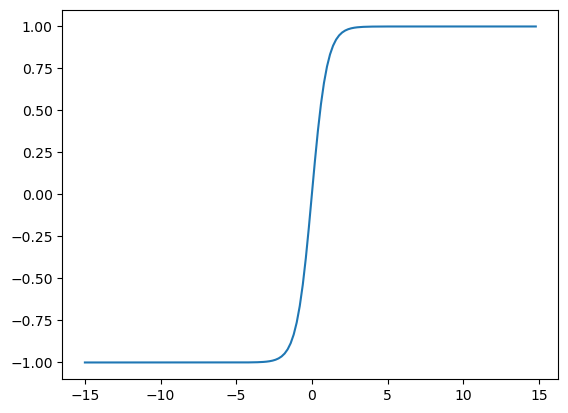

In [37]:
#TanH activation fucntion acomodates all the provided x values outputs in between positive one and negative one.
sample_temps = np.arange(-15,15, 0.2)
plt.plot(sample_temps, np.tanh(sample_temps))

In [38]:
# Now performing the forward pass step using TanH function

In [39]:
#initializing weights and bias
np.random.seed(0)
i_weight = np.random.rand(1,5)/5-0.1
h_weight = np.random.rand(5,5)/5-0.1
h_bias = np.random.rand(1,5)/5-0.1

o_weight = np.random.rand(5,1)*50
o_bias = np.random.rand(1,1)

In [40]:
outputs = np.zeros(3)
hiddens = np.zeros((3,5))
prev_hidden = None
sequence = data['tmax'].tail(3).to_numpy()
for i in range(3):
    x = sequence[i].reshape(1,1)

    xi = x@i_weight
    if prev_hidden is None:
        xh = xi
    else:
        xh = xi+prev_hidden @h_weight +h_bias
    
    xh = np.tanh(xh)
    prev_hidden = xh
    hiddens[i,] = xh

    xo = xh@o_weight +o_bias
    outputs[i] = xo
print(f'Outputs: {outputs}')
print(f'Hiddens { hiddens}')

Outputs: [74.31470595 80.66149404 77.67852446]
Hiddens [[ 0.56784618  0.99320288  0.87557333  0.53166114 -0.76483255]
 [ 0.58366756  0.99568651  0.90034879  0.69338529 -0.84149203]
 [ 0.5383306   0.99164251  0.86287584  0.66091071 -0.80543591]]


In [41]:
sequence

array([66., 70., 62.])

In [42]:
import numpy as np
def mse(actual, predicted):
    return np.mean((actual-predicted)**2)

def mse_grad(actual,predicted):
    return(predicted-actual)

actuals = np.array([112,134,179])

loss_grad = mse_grad(actuals, outputs)
loss_grad

array([ -37.68529405,  -53.33850596, -101.32147554])

In [ ]:
next_hidden = None

o_weight_grad, o_bias_grad, h_weight_grad, h_bias_grad, i_weight_grad = [0] * 5

for i in range(2, -1, -1):
    l_grad = loss_grad[i].reshape(1,1)

    o_weight_grad += hiddens[i][:,np.newaxis] @ l_grad
    o_bias_grad += np.mean(l_grad)

    o_grad = l_grad @ o_weight.T

    # Only add in the hidden gradient if a next sequence exists
    if next_hidden is not None:
        h_grad = o_grad + next_hidden @ h_weight.T
    else:
        h_grad = o_grad

    tanh_deriv = 1 - hiddens[i,:][np.newaxis,:] ** 2
    h_grad = np.multiply(h_grad, tanh_deriv)

    next_hidden = h_grad

    # Don't update the hidden weights for the first sequence position
    if i > 0:
        h_weight_grad += hiddens[i-1,:][:,np.newaxis] @ h_grad
        h_bias_grad += np.mean(h_grad)

    i_weight_grad += sequence[i].reshape(1,1).T @ h_grad


In [54]:
#COMPLETE IMPLEMENTATION
from sklearn.preprocessing import StandardScaler
import math

lr = 1e-6
lr = lr / 3

i_weight -= i_weight_grad * lr
h_weight -= h_weight_grad * lr
h_bias -= h_bias_grad * lr
o_weight -= o_weight_grad * lr
o_bias -= o_bias_grad * lr
data = pd.read_csv('./data/weather.csv')

PREDICTORS = ["tmax", "tmin", "rain"]
TARGET = "tmax_tomorrow"

scaler = StandardScaler()
data[PREDICTORS] = scaler.fit_transform(data[PREDICTORS])
np.random.seed(0)
split_data = np.split(data, [int(.7*len(data)), int(.85*len(data))])
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = [[d[PREDICTORS].to_numpy(), d[[TARGET]].to_numpy()] for d in split_data]
train_x

c:\Users\hp\anaconda3\envs\pytorch\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


array([[-0.72730375, -2.27405096, -0.25506937],
       [-1.68867338, -1.68456268, -0.25506937],
       [-1.68867338, -2.27405096, -0.25506937],
       ...,
       [ 0.47440827,  1.70499492, -0.25506937],
       [ 0.23406587,  1.26287872, -0.25506937],
       [ 1.31560669,  1.26287872, -0.25506937]])

In [55]:
def init_params(layer_conf):
    layers = []
    for i in range(1, len(layer_conf)):
        np.random.seed(0)
        k = 1/math.sqrt(layer_conf[i]["hidden"])
        i_weight = np.random.rand(layer_conf[i-1]["units"], layer_conf[i]["hidden"]) * 2 * k - k

        h_weight = np.random.rand(layer_conf[i]["hidden"], layer_conf[i]["hidden"]) * 2 * k - k
        h_bias = np.random.rand(1, layer_conf[i]["hidden"]) * 2 * k - k

        o_weight = np.random.rand(layer_conf[i]["hidden"], layer_conf[i]["output"]) * 2 * k - k
        o_bias = np.random.rand(1, layer_conf[i]["output"]) * 2 * k - k

        layers.append(
            [i_weight, h_weight, h_bias, o_weight, o_bias]
        )
    return layers

In [56]:
def forward(x, layers):
    hiddens = []
    outputs = []
    for i in range(len(layers)):
        i_weight, h_weight, h_bias, o_weight, o_bias = layers[i]
        hidden = np.zeros((x.shape[0], i_weight.shape[1]))
        output = np.zeros((x.shape[0], o_weight.shape[1]))
        for j in range(x.shape[0]):
            input_x = x[j,:][np.newaxis,:] @ i_weight
            hidden_x = input_x + hidden[max(j-1,0),:][np.newaxis,:] @ h_weight + h_bias
            hidden_x = np.tanh(hidden_x)
            hidden[j,:] = hidden_x

            output_x = hidden_x @ o_weight + o_bias
            output[j,:] = output_x
        hiddens.append(hidden)
        outputs.append(output)
    return hiddens, outputs[-1]

In [ ]:
def backward(layers, x, lr, grad, hiddens):
    for i in range(len(layers)):
        i_weight, h_weight, h_bias, o_weight, o_bias = layers[i]
        hidden = hiddens[i]
        next_h_grad = None
        i_weight_grad, h_weight_grad, h_bias_grad, o_weight_grad, o_bias_grad = [0] * 5

        for j in range(x.shape[0] - 1, -1, -1):
            out_grad = grad[j,:][np.newaxis, :]

            o_weight_grad += hidden[j,:][:, np.newaxis] @ out_grad
            o_bias_grad += out_grad

            h_grad = out_grad @ o_weight.T

            if j < x.shape[0] - 1:
                hh_grad = next_h_grad @ h_weight.T
                h_grad += hh_grad

            tanh_deriv = 1 - hidden[j][np.newaxis,:] ** 2

            h_grad = np.multiply(h_grad, tanh_deriv)

            next_h_grad = h_grad.copy()

            if j > 0:
                h_weight_grad += hidden[j-1][:, np.newaxis] @ h_grad
                h_bias_grad += h_grad

            i_weight_grad += x[j,:][:,np.newaxis] @ h_grad

        lr = lr / x.shape[0]
        i_weight -= i_weight_grad * lr
        h_weight -= h_weight_grad * lr
        h_bias -= h_bias_grad * lr
        o_weight -= o_weight_grad * lr
        o_bias -= o_bias_grad * lr
        layers[i] = [i_weight, h_weight, h_bias, o_weight, o_bias]
    return layers

In [ ]:
epochs = 200
lr = 1e-5

layer_conf = [
    {"type":"input", "units": 3},
    {"type": "rnn", "hidden": 4, "output": 1}
]
layers = init_params(layer_conf)

for epoch in range(epochs):
    sequence_len = 7
    epoch_loss = 0
    for j in range(train_x.shape[0] - sequence_len):
        seq_x = train_x[j:(j+sequence_len),]
        seq_y = train_y[j:(j+sequence_len),]
        hiddens, outputs = forward(seq_x, layers)
        grad = mse_grad(seq_y, outputs)
        params = backward(layers, seq_x, lr, grad, hiddens)
        epoch_loss += mse(seq_y, outputs)

    if epoch % 50 == 0:
        sequence_len = 7
        valid_loss = 0
        for j in range(valid_x.shape[0] - sequence_len):
            seq_x = valid_x[j:(j+sequence_len),]
            seq_y = valid_y[j:(j+sequence_len),]
            _, outputs = forward(seq_x, layers)
            valid_loss += mse(seq_y, outputs)

        print(f"Epoch: {epoch} train loss {epoch_loss / len(train_x)} valid loss {valid_loss / len(valid_x)}")